### 필요 패키지 설치
- 2분 정도 소요됩니다.

In [ ]:
!python -m pip install numpy pandas seaborn matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement some_module (from versions: none)
ERROR: No matching distribution found for some_module

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### seaborn - tips 데이터 불러오기

In [2]:
import seaborn as sns

df = sns.load_dataset("tips")

print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### seaborn - titanic 데이터 불러오기

In [4]:
import seaborn as sns

df = sns.load_dataset("titanic")

print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### scikit-learn - wine 데이터 불러오기

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

df, y = load_wine(as_frame=True, return_X_y=True)
df["quality"] = y

print(df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

### EDA 샘플 코드

In [ ]:
df, y = load_wine(as_frame=True, return_X_y=True)
df["quality"] = y



sample_count = len(df)
assert sample_count == 178, f"총 샘플 수는 178이어야 합니다. (got {sample_count})"

feature_count = df.shape[1]
assert feature_count == 14, f"특성 수는 14이어야 합니다. (got {feature_count})"

class_count = pd.Series(y).nunique()
assert class_count == 3, f"클래스 개수는 3이어야 합니다. (got {class_count})"

class_distribution = pd.Series(y).value_counts().sort_index()
expected_distribution = pd.Series({0: 59, 1: 71, 2: 48})
assert class_distribution.sort_index().equals(expected_distribution.sort_index()), \
    f"클래스 분포가 예상과 다릅니다.\nexpected:\n{expected_distribution}\ngot:\n{class_distribution}"

top_alcohol_class = pd.DataFrame({"y": y, "alcohol": df["alcohol"]}).groupby("y")["alcohol"].mean().idxmax()
assert top_alcohol_class == 0, f"Alcohol 평균이 가장 높은 클래스는 0입니다. (got {top_alcohol_class})"

malic_mean = df["malic_acid"].mean()
assert np.isclose(malic_mean, 2.3363483146, atol=1e-3), f"Malic acid 평균이 예상과 다릅니다. (got {malic_mean})"

malic_std = df["malic_acid"].std(ddof=1)
assert np.isclose(malic_std, 1.1171460976, atol=1e-3), f"Malic acid 표준편차가 예상과 다릅니다. (got {malic_std})"

high_color_ratio = (df["color_intensity"] >= 10).mean() * 100
assert np.isclose(high_color_ratio, 3.93258427, atol=1e-2), f"Color intensity>=10 비율(%)이 예상과 다릅니다. (got {high_color_ratio})"

min_ash_idx = df["ash"].idxmin()
min_ash_class = int(y.iloc[min_ash_idx] if hasattr(y, "iloc") else pd.Series(y).iloc[min_ash_idx])
assert min_ash_class == 1, f"Ash 최소값을 가진 샘플의 클래스는 1입니다. (got {min_ash_class})"

bins = 20
global_min, global_max = df["proline"].min(), df["proline"].max()
peak_by_class = {}
y_series = pd.Series(y)
for cls in y_series.unique():
    counts, _ = np.histogram(df.loc[y_series == cls, "proline"], bins=bins, range=(global_min, global_max))
    peak_by_class[int(cls)] = counts.max()
proline_peak_class = max(peak_by_class, key=peak_by_class.get)
assert proline_peak_class == 1, f"Proline 분포 피크가 가장 높은 클래스는 1입니다. (got {proline_peak_class})"

thresh = df["magnesium"].quantile(0.9)
high_magnesium_proline_mean = df.loc[df["magnesium"] >= thresh, "proline"].mean()
assert np.isclose(high_magnesium_proline_mean, 864.75, atol=1e-2), \
    f"Magnesium 상위 10%의 평균 Proline은 약 864.75입니다. (got {high_magnesium_proline_mean})"

num_df = df.select_dtypes(include=["number"])
corr_with_alcohol = num_df.corr(numeric_only=True)["alcohol"].drop("alcohol")
top_corr_with_alcohol = corr_with_alcohol.abs().idxmax()
assert top_corr_with_alcohol == "proline", f"Alcohol과 가장 상관 높은 특성은 'proline'입니다. (got {top_corr_with_alcohol})"

### 상관관계 분석

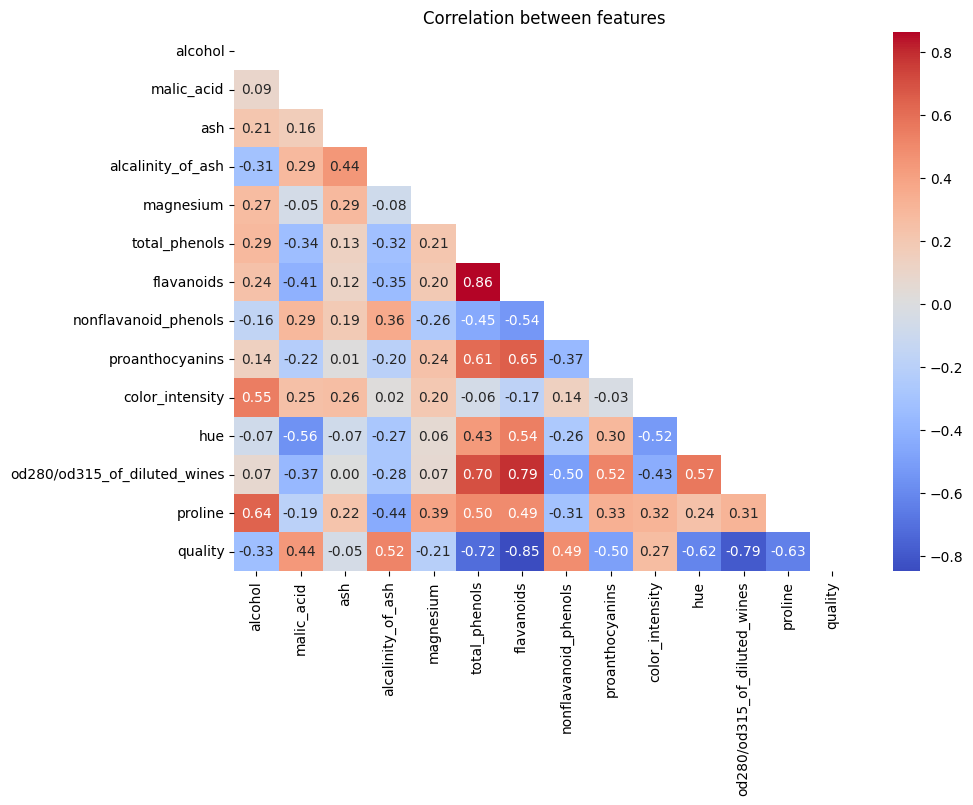

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 7))

n = len(corr)
mask = np.triu(np.ones((n, n)))
sns.heatmap(data=corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
ax.grid(False)
ax.set_title("Correlation between features")
plt.show()

### 분포 살펴보기 - 1

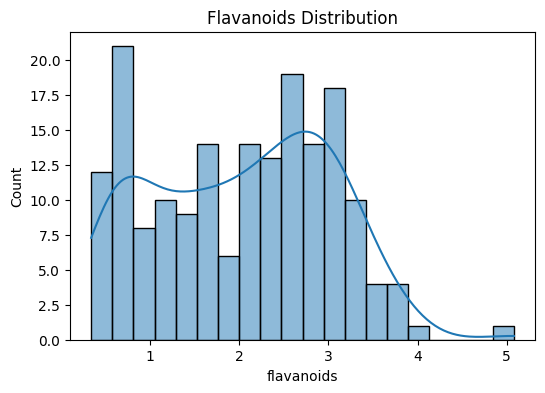

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='flavanoids', bins=20, kde=True)
plt.title('Flavanoids Distribution')
plt.show()

### 분포 살펴보기 - 2

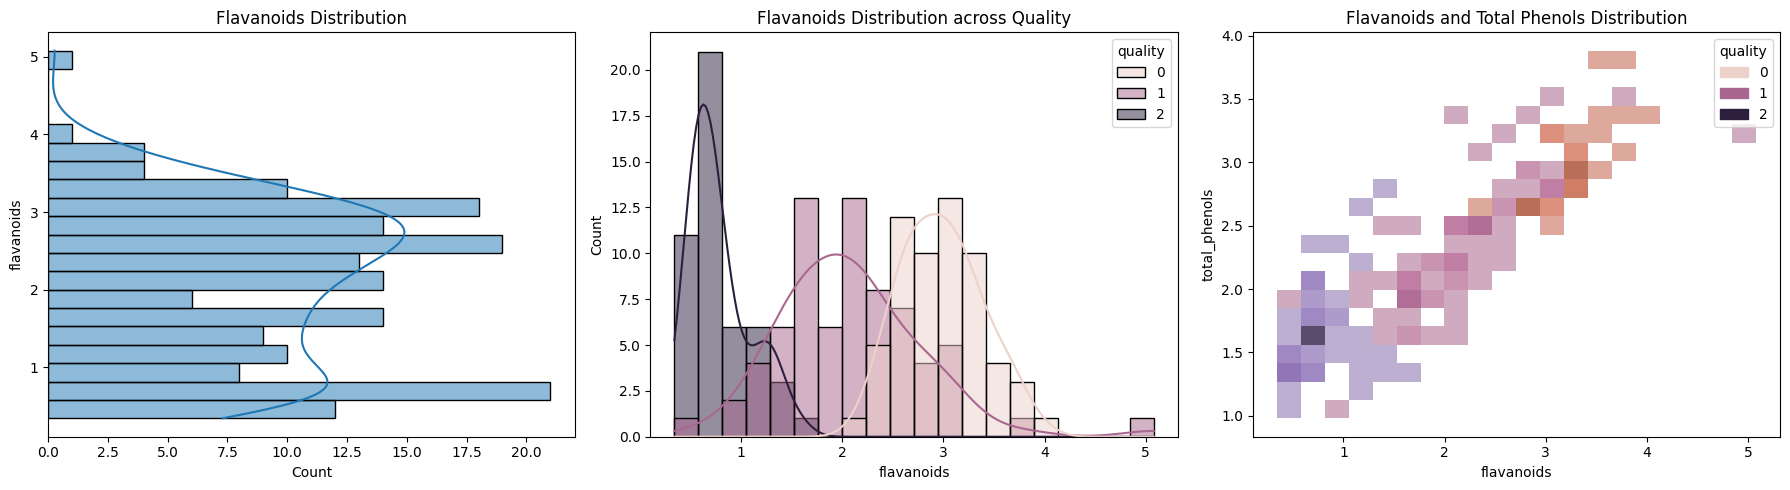

In [12]:
fig, ax = plt.subplots(figsize=(18, 5), ncols=3)

sns.histplot(data=df, y="flavanoids", bins=20, kde=True, ax=ax[0])
ax[0].set_title('Flavanoids Distribution')

sns.histplot(data=df, x="flavanoids", hue="quality", bins=20, kde=True, ax=ax[1])
ax[1].set_title('Flavanoids Distribution across Quality')

sns.histplot(data=df, x="flavanoids", y="total_phenols", hue="quality", bins=20, kde=True, ax=ax[2])
ax[2].set_title('Flavanoids and Total Phenols Distribution')

fig.tight_layout()
plt.show()

### 분포 살펴보기 - 3

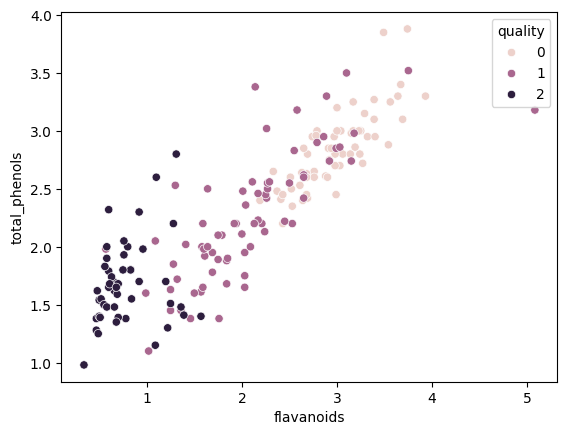

In [13]:
sns.scatterplot(data=df, x="flavanoids", y="total_phenols", hue="quality")
plt.show()

### 분포 살펴보기 - 4

선택된 feature: ['flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols', 'proline', 'hue']


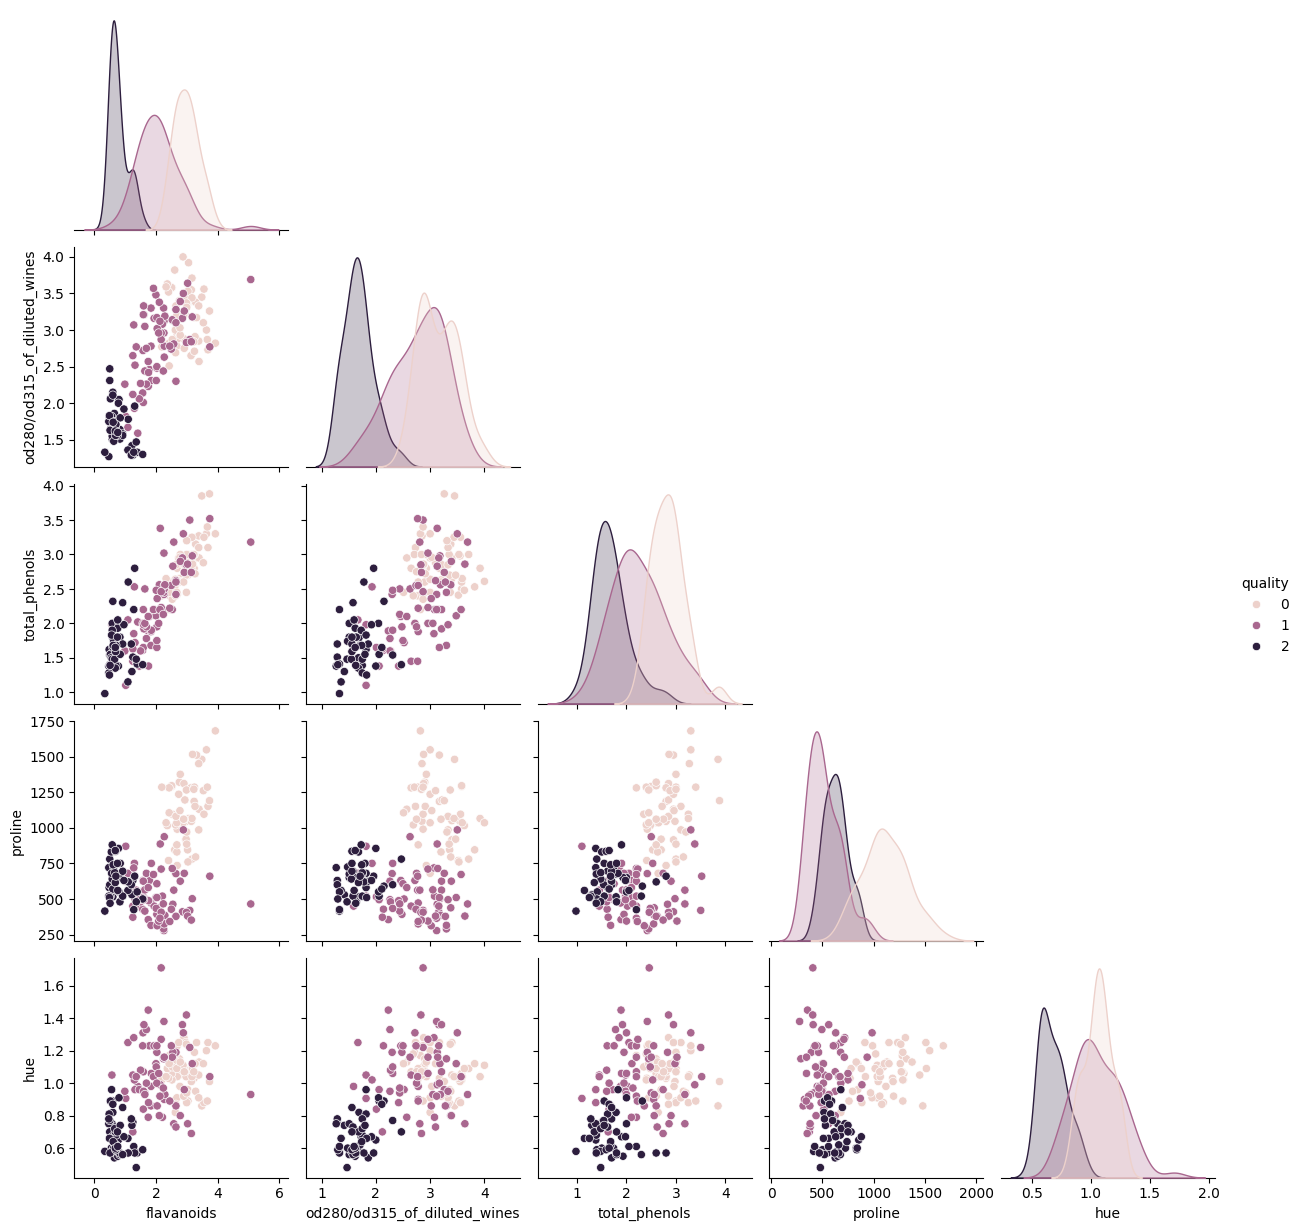

In [14]:
corr_with_quality = corr['quality'].abs().sort_values(ascending=False)
top_features = corr_with_quality.index[1:6] 
print("선택된 feature:", top_features.tolist())

plot_df = df[top_features.tolist() + ['quality']]
sns.pairplot(data=plot_df, hue="quality", corner=True)
plt.show()

### 결측치와 이상치

alcohol                          0
malic_acid                       0
ash                              0
alcalinity_of_ash                0
magnesium                        0
total_phenols                    0
flavanoids                      10
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
quality                          0
dtype: int64


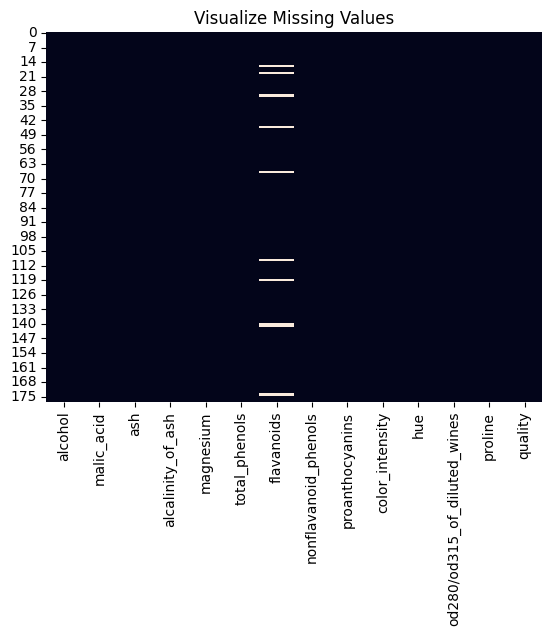

In [15]:
df_missing = df.copy()

np.random.seed(42)
missing_idx = np.random.choice(df_missing.index, size=10, replace=False)
df_missing.loc[missing_idx, 'flavanoids'] = np.nan

outlier_idx = np.random.choice(df_missing.index, size=5, replace=False)
df_missing.loc[outlier_idx, 'alcohol'] = df_missing['alcohol'].mean() * 5

print(df_missing.isnull().sum())

sns.heatmap(df_missing.isnull(), cbar=False)
plt.title("Visualize Missing Values")
plt.show()

### 결측치 처리

alcohol 이상치 개수: 5


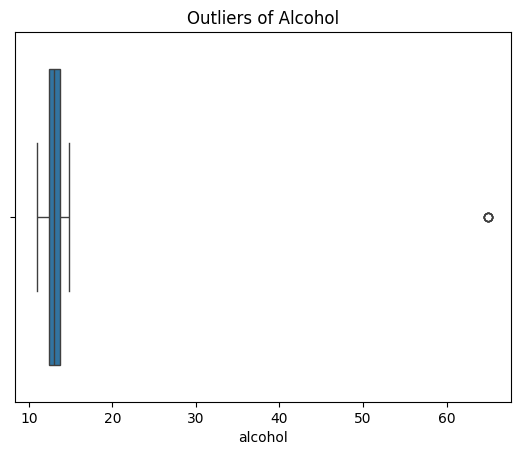

In [20]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_alcohol = detect_outliers_iqr(df_missing, 'alcohol')
print(f"alcohol 이상치 개수: {len(outliers_alcohol)}")

# boxplot으로 이상치 확인
sns.boxplot(x=df_missing['alcohol'])
plt.title("Outliers of Alcohol")
plt.show()

In [21]:
!python -m pip install some_module

df_filled = df_missing.fillna(df_missing.mean(numeric_only=True))
assert df_filled['flavanoids'].isnull().sum() == 0, "❌ flavanoids 컬럼에 결측치가 남아 있습니다."

df_no_outliers = df_filled[~df_filled.index.isin(outliers_alcohol.index)]

from scipy.stats import iqr
Q1 = df_filled['alcohol'].quantile(0.25)
Q3 = df_filled['alcohol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_remaining = df_no_outliers[(df_no_outliers['alcohol'] < lower_bound) | (df_no_outliers['alcohol'] > upper_bound)]
assert len(outliers_remaining) == 0, f"❌ alcohol 컬럼에 이상치가 {len(outliers_remaining)}개 남아 있습니다."

print(f"처리 전 데이터 크기: {df_missing.shape}")
print(f"이상치 제거 후 데이터 크기: {df_no_outliers.shape}")

처리 전 데이터 크기: (178, 14)
이상치 제거 후 데이터 크기: (173, 14)


ERROR: Could not find a version that satisfies the requirement some_module (from versions: none)
ERROR: No matching distribution found for some_module

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 선형 회귀

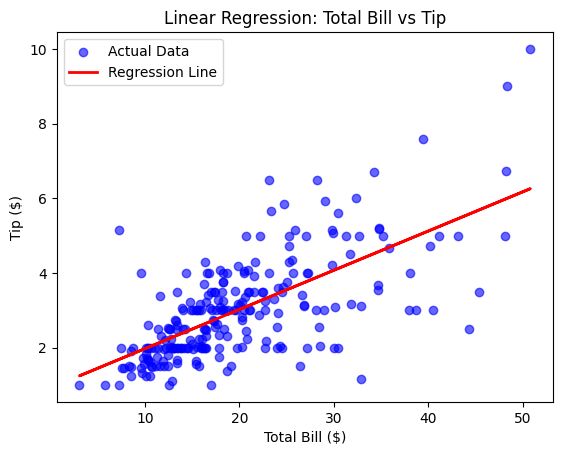

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

tips = sns.load_dataset("tips")
X = tips["total_bill"].values.reshape(-1, 1)
y = tips["tip"].values

model = LinearRegression()
model.fit(X, y)

y_hat = model.predict(X)

plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X, y_hat, color='red', linewidth=2, label='Regression Line')

plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.title("Linear Regression: Total Bill vs Tip")
plt.legend()
plt.show()

### 로지스틱 회귀

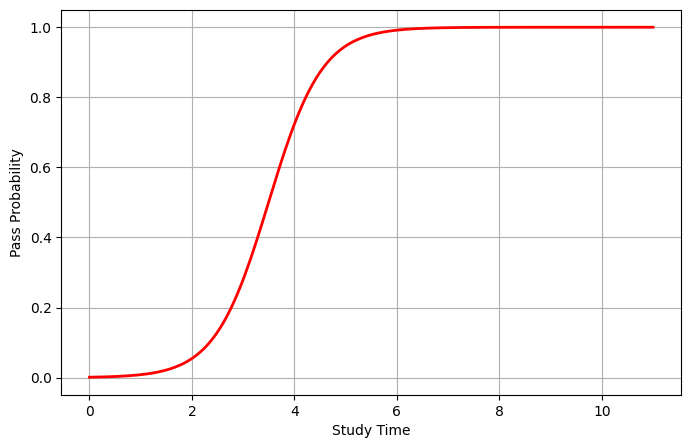

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 공부 시간 (입력값)
X = np.array([1,2,3,4,5,6,2,3,4,5,6,7,1,2,3,4,5,6,7,8,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)

# 합격 여부 (출력값)
y = np.array([0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1])

model = LogisticRegression()
model.fit(X, y)

X_new = np.linspace(0, 11, 200).reshape(-1, 1) # 0~11시간까지 세밀하게
y_hat = model.predict_proba(X_new) # [탈락확률, 합격확률]
y_hat = y_hat[:, 1] # 합격 확률만 추출

plt.figure(figsize=(8, 5))
plt.plot(X_new, y_hat, color='red', linewidth=2)
plt.xlabel("Study Time")
plt.ylabel("Pass Probability")
plt.grid(True)
print()